The goal of this notebook is to enable easy analysis of the existing simulations performed for "Random plasmid partitioning reduces the evolutionary stability of synthetic genetic circuits" Halleran, Flores-Bautista and Murray, 2019. In total there are 3888 simulations (162 different combinations of parameters, 24 separate stochastic simulations for each). Those simulations took an 8-core CPU ~48 hours to simulate. 

First we will load in all of the data from the simulations and then we will recreate figures 3C, 4C, and 5C from the paper. 

In [23]:
# All import statements. This should only require Anaconda to run correctly. 
import collections
import bisect
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import numba
import time
import multiprocessing
from scipy.stats import hypergeom

# This is just a bit of formatting for our plots to make them look a bit nicer than 
# the default
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.0, 'lines.markersize': 5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

tw = 1.5
sns.set_style({"xtick.major.size": 6, "ytick.major.size": 6,
               "xtick.minor.size": 4, "ytick.minor.size": 4,
               'axes.labelsize': 24,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize= 21) 
mpl.rc('ytick', labelsize= 21)
mpl.rc('axes', linewidth=1.75)
# Setting this font type allows the figure object to be edited in Illustrator / Affinity 
# to change font size, color, etc.
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.gcf().subplots_adjust(bottom=0.15)
sns.set_style({'axes.labelsize': 30})

# This enables high res graphics inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
def get_burden_from_grs(dataframe):
    raw_grs = dataframe['growth_rates'].values 
    burdens = []
    for gr in raw_grs:
        burden = np.round(1-float(gr[1:5]), 3)
        burdens.append(burden)
    
    dataframe['burdens'] = np.array(burdens)
    return dataframe

In [15]:
# Load in the 8 different simulation files. Each one has three
# replicates of each simulation condition, together there are 24 replicates.
df_1 = pd.read_csv('full_run_3N_1.csv')
df_2 = pd.read_csv('full_run_3N_2.csv')
df_3 = pd.read_csv('full_run_3N_3.csv')
df_4 = pd.read_csv('full_run_3N_4.csv')
df_5 = pd.read_csv('full_run_3N_5.csv')
df_6 = pd.read_csv('full_run_3N_6.csv')
df_7 = pd.read_csv('full_run_3N_7.csv')
df_8 = pd.read_csv('full_run_3N_8.csv')

# Concatenate the eight separate summary dataframes into one dataframe.
df_tot = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8])

# Add a column for the total burden (calculated by the listed growth rates)
# for easy plotting.
df_tot = get_burden_from_grs(df_tot)

# Replace 0s (times where no answer was found for how long it takes to break) with 2000,
# the max run time for the simulation. Note - be careful, an answer of 2000 simply means the
# simulation never found when the mutants take over (by omega, gamma, or tau), it does not
# say anything more than that. 
df_tot = df_tot.replace(0, 2000)

# Make three smaller dataframes for easier plotting. These are split by the
# selection mode used in the simulation. 
df_dominant = df_tot.loc[df_tot['selection mode'] == 'dominant']
df_additive = df_tot.loc[df_tot['selection mode'] == 'additive']
df_recessive = df_tot.loc[df_tot['selection mode'] == 'recessive']

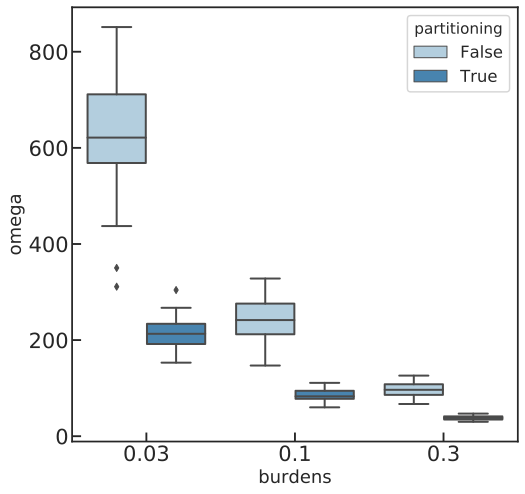

In [16]:
# An example figure. This is figure 3C from the paper paper.  
plt.figure(figsize=(8,8))
# Note, as discussed in the simulation notebook, "copy number" here refers to the number of 
# states in the simulation, where number of states = Number of Plasmids + 1. 
sns.boxplot(data=df_additive.loc[(df_additive['mutation_rate']== 1e-4) & 
                                  (df_additive['copy number']== 4)],
                                 x='burdens', y='omega', hue='partitioning',
                                palette='Blues', dodge=True)

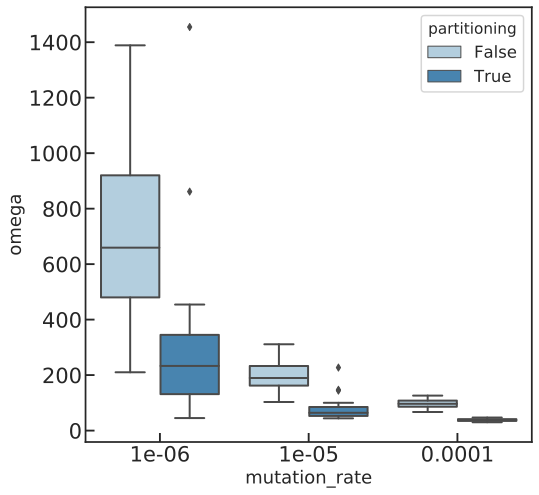

In [17]:
# An example figure. This is figure 4C from the paper paper.  
plt.figure(figsize=(8,8))
# Note, as discussed in the simulation notebook, "copy number" here refers to the number of 
# states in the simulation, where number of states = Number of Plasmids + 1. 
sns.boxplot(data=df_additive.loc[(df_additive['burdens']== 0.3) & 
                                  (df_additive['copy number']== 4)],
                                 x='mutation_rate', y='omega', hue='partitioning',
                                palette='Blues', dodge=True)

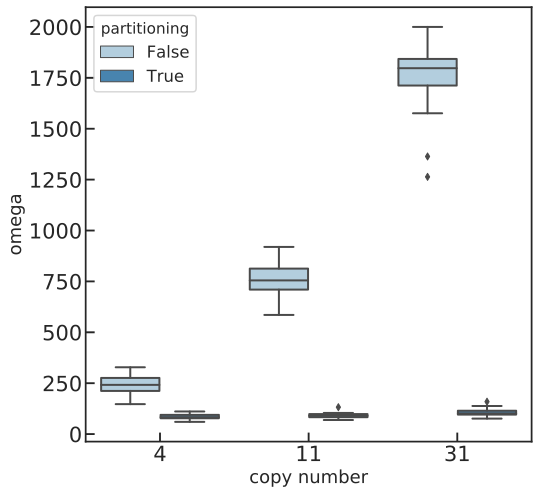

In [22]:
# An example figure. This is figure 5C from the paper paper.  
plt.figure(figsize=(8,8))
# Note, as discussed in the simulation notebook, "copy number" here refers to the number of 
# states in the simulation, where number of states = Number of Plasmids + 1. 
sns.boxplot(data=df_additive.loc[(df_additive['burdens']== 0.1) & 
                                  (df_additive['mutation_rate']== 1e-4)],
                                 x='copy number', y='omega', hue='partitioning',
                                palette='Blues', dodge=True)